<a href="https://colab.research.google.com/github/kingkong135/KPDL/blob/master/Week_2_Point_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
root_path = "drive/My Drive/Colab Notebooks/image processing/week 2/"

# Week 2: Point operations

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# 2.1 Image negation

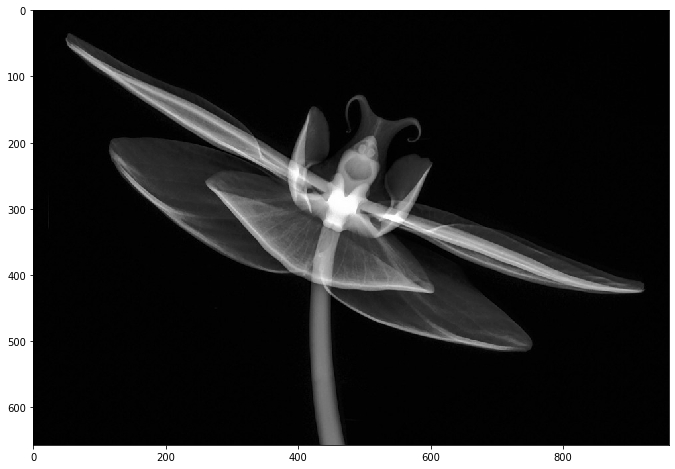

In [0]:
xray = cv2.imread(root_path+"xray.jpeg",0)
plt.imshow(xray, cmap='gray')

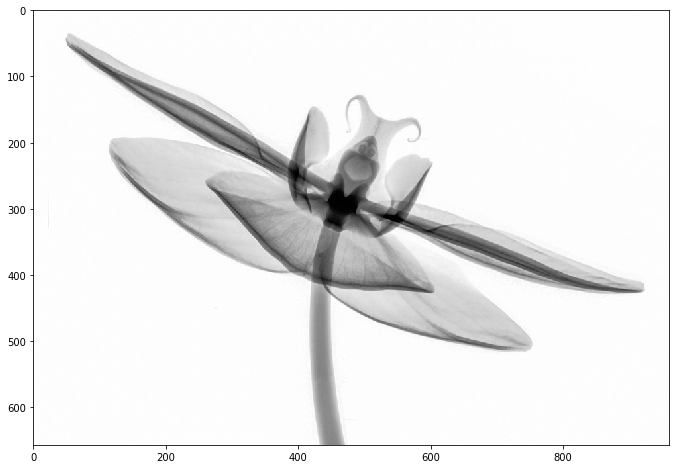

In [0]:
negation = 255 - xray
plt.imshow(negation, cmap='gray')

# 2.2. Gamma correction

In [0]:
# plot a quantization image of k level
def draw_quantization_img(levels, height=32):
  #convert it to an image
  img = [levels] * height
  img = np.array(img)
  plt.imshow(img, 'gray')
  #plt.axis('off')

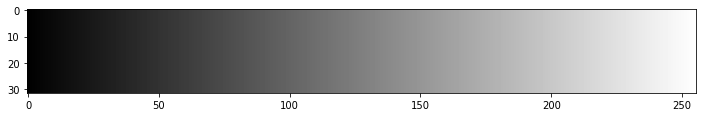

In [0]:
gray_256 = list(range(0, 256, 1))
draw_quantization_img(gray_256)

64


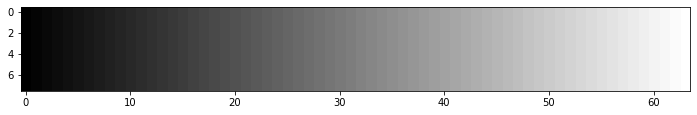

In [0]:
gray_64 = list(range(0,256, 4))
print(len(gray_64))
draw_quantization_img(gray_64, height = 8)

32


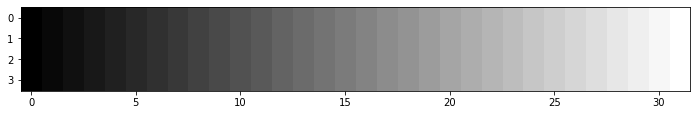

In [0]:
gray_32 = list(range(0, 256, 8))
print(len(gray_32))
draw_quantization_img(gray_32, height=4)

16


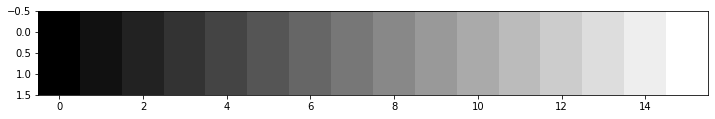

In [0]:
gray_16 = list(range(0, 256, 16))
print(len(gray_16))
draw_quantization_img(gray_16, height=2)

8


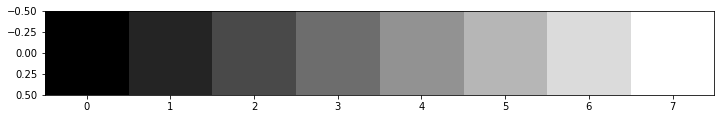

In [0]:
gray_8 = list(range(0, 256, 32))
print(len(gray_8))
draw_quantization_img(gray_8, height=1)

## Gamma
### $ v_{out} = v_{in}^\gamma$

$v_{in}$ : độ sáng thực tế (actual luminance value)

$v_{out}$: độ sáng cảm nhận (output luminance value)



In [0]:
def adjust_gamma(inlevels, gamma=1.0, debug=True):
  out = [l**gamma for l in inlevels]
  max_out = max(out)
  out = [int(l/max_out * 256) for l in out]
  print(out)
  return out

[0, 17, 34, 51, 68, 85, 102, 119, 136, 153, 170, 187, 204, 221, 238, 256]


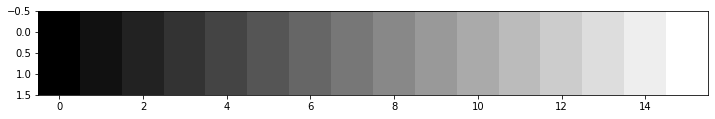

In [0]:
# Không điều chỉnh gamma (no adjustment) 
draw_quantization_img(
    adjust_gamma(gray_16, gamma=1),
    height=2
)

[0, 0, 3, 7, 13, 22, 34, 47, 64, 83, 104, 129, 156, 186, 219, 256]


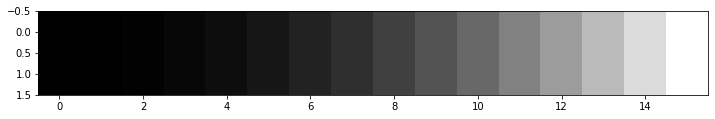

In [0]:
#with gamma >1, the levels are shifted toward the the darker end of the spectrum
draw_quantization_img(
        adjust_gamma(gray_16, gamma=2.2),
        height=2
)

[0, 74, 102, 123, 140, 155, 168, 181, 192, 202, 212, 222, 231, 239, 248, 256]


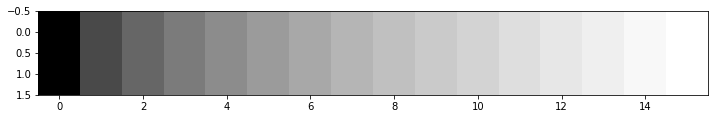

In [0]:
#with gamma < 1, lighter
draw_quantization_img(
        adjust_gamma(gray_16, gamma=1/2.2, debug=True),
        height=2
)

# Logarithmic graph


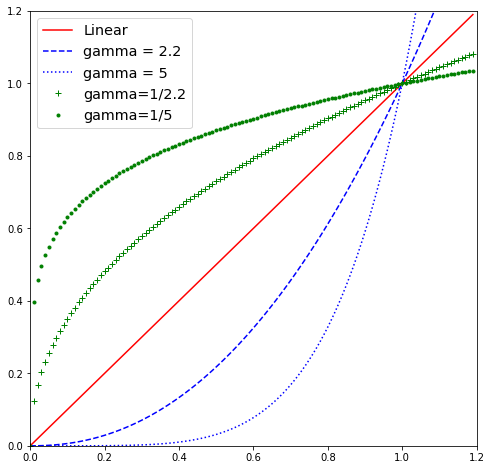

In [0]:
x = np.arange(0, 1.2, 0.01)

g1 = np.power(x,1)
g2 = np.power(x, 2.2) #gamma = 2.2
g3 = np.power(x, 5)   #gamma = 5
g4 = np.power(x, 1/2.2)
g5 = np.power(x, 1/5)

fig, ax = plt.subplots()
ax.plot(x, g1, 'r', label = 'Linear')
ax.plot(x, g2, 'b--', label = 'gamma = 2.2')
ax.plot(x, g3, 'b:', label = 'gamma = 5')
ax.plot(x, g4, 'g+', label = 'gamma=1/2.2')
ax.plot(x, g5, 'g.', label = 'gamma=1/5')

ax.set_xlim([0,1.2])
ax.set_ylim([0, 1.2])
legend = ax.legend(loc='upper left', fontsize = 'x-large')

plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

## Using gamma to adjust contrast

### 1. Low exposure

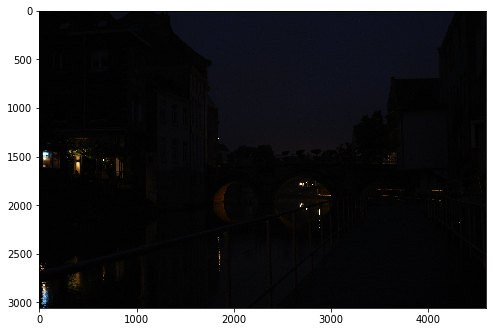

In [0]:
low = cv2.imread(root_path+"low-exposure.jpg")
plt.imshow(low[:,:,::-1])

In [0]:
def adjust_image_gamma(image, gamma = 1.0):
  image = np.power(image, gamma)
  max_val = np.max(image.ravel())
  image = image/max_val * 255
  image = image.astype(np.uint8)
  return image

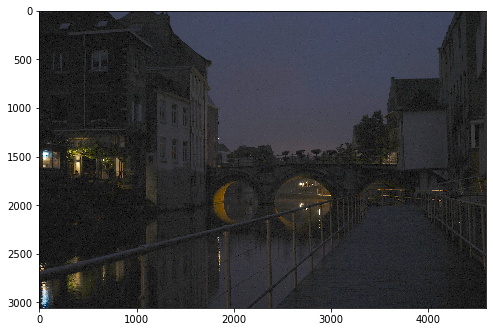

In [0]:
low_adjusted = adjust_image_gamma(low, 0.45)
plt.imshow(low_adjusted[:,:,::-1])

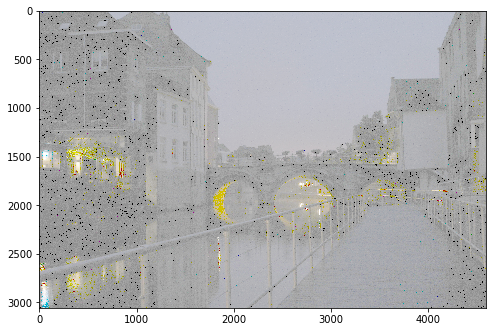

In [0]:
# what if gamma is too low?
low_adjusted = adjust_image_gamma(low, 0.1)
plt.imshow(low_adjusted[:,:,::-1])

In [0]:
%timeit low_adjusted = adjust_image_gamma(low, 0.1)

1 loop, best of 3: 2.51 s per loop


In [0]:
#faster way to compute
#reference: https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
def adjust_image_gamma_lookuptable(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    table = np.array([((i / 255.0) ** gamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

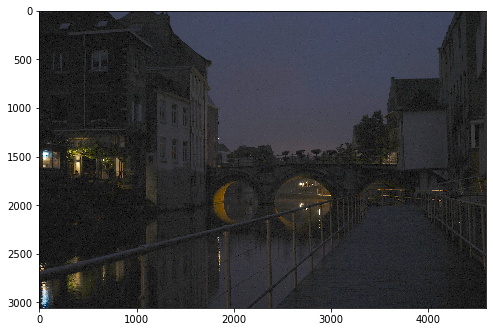

In [0]:
low_adjusted = adjust_image_gamma_lookuptable(low, 0.45)
plt.imshow(low_adjusted[:,:,::-1])

In [0]:
%timeit adjust_image_gamma_lookuptable(low, 0.45)

10 loops, best of 3: 27.6 ms per loop


## Overexposure

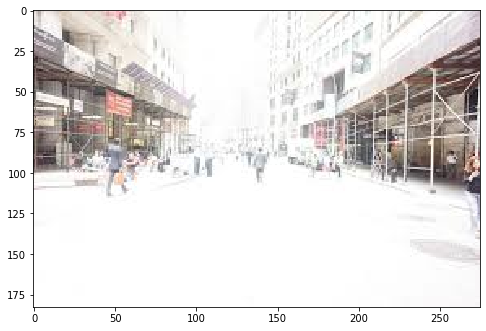

In [0]:
high = cv2.imread(root_path + "high-exposure.jpg")
plt.imshow(high[:,:,::-1])

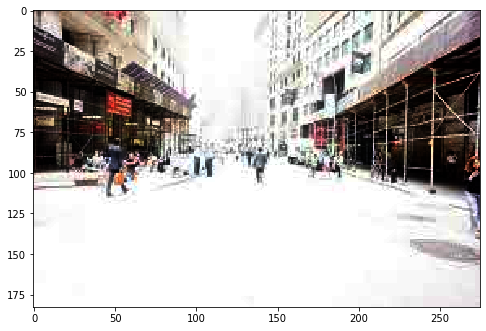

In [0]:
adjusted_high = adjust_image_gamma_lookuptable(high, 4)
plt.imshow(adjusted_high[:,:,::-1])

# 2.3. Correct using pixel transform

Reference: https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html

Dùng phép toán nhân và cộng $g(x) = \alpha f(x) + \beta$

$\alpha$ và $\beta$ còn được gọi là tham số gain và bias, hoặc tham số để điều chỉnh contrast (độ tương phản) và brightness (độ sáng)

Với ảnh số: $g(i, j) = \alpha \cdot f(i, j) + \beta$

In [0]:
def pixel_transform(image, alpha = 1.0, beta = 0):
  '''
  out[pixel] = alpha * image[pixel] + beta
  '''
  output = np.zeros(image.shape, image.dtype)
  h, w, ch = image.shape
  for y in range(h):
    for x in range(w):
      for c in range(ch):
        output[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

  return output

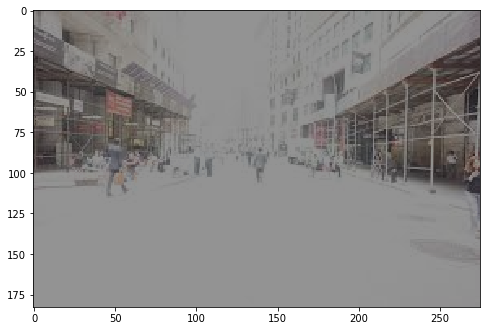

In [0]:
transformed_high = pixel_transform(high, 0.5, 20)
plt.imshow(transformed_high[:,:,::-1])

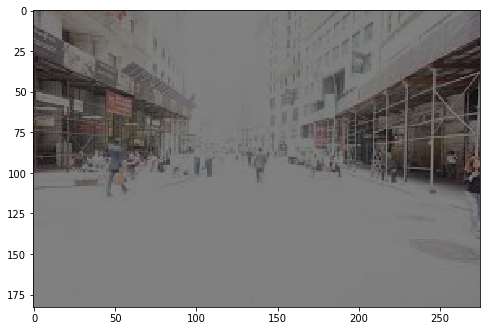

In [0]:
#anyway, a faster 
transformed_high = cv2.convertScaleAbs(high, 20, 0.5)
plt.imshow(transformed_high[:,:,::-1])

In [0]:
# compare time
%timeit pixel_transform(high, 0.5, 20)

1 loop, best of 3: 4.15 s per loop


In [0]:
%timeit cv2.convertScaleAbs(high, 20, 0.5)

The slowest run took 54.36 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 63.1 µs per loop


# 2.4. Point operations for combining images


## 2.4.1. Image averaging for noise reduction


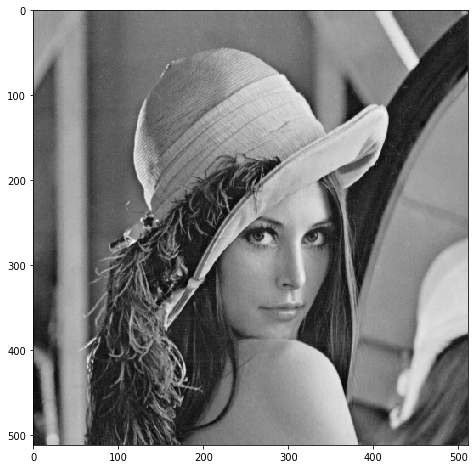

In [0]:
ori = cv2.imread(root_path + "lena.jpg", 0)
plt.imshow(ori, cmap = 'gray')

In [0]:
# now make several image from noisy 
def generate_noise_image(img, mean = 0, sigma = 0):
  gaussian = np.random.normal(mean, sigma, img.shape)
  noisy_img = img + gaussian
  return noisy_img

def make_batch(img, num_output = 4):
  sigmas = np.random.rand(num_output) * 2
  #print(sigmas)
  noisy_imgs = [generate_noise_image(img, sigma = sigma) for sigma in sigmas]
  return noisy_imgs
  

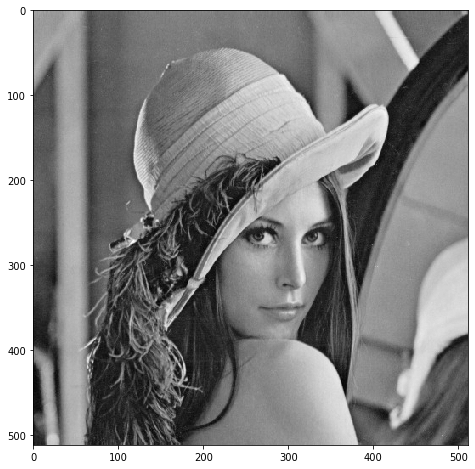

In [0]:
#make 4 images
noisy_imgs = make_batch(ori, num_output=4)
noisy_imgs = np.array(noisy_imgs)
denoised = np.mean(noisy_imgs, axis = 0)
plt.imshow(denoised, cmap = 'gray')

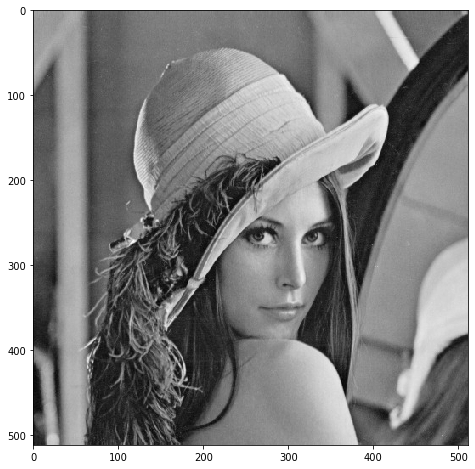

In [0]:
#make 25 images
noisy_imgs = make_batch(ori, num_output=25)
noisy_imgs = np.array(noisy_imgs)
denoised = np.mean(noisy_imgs, axis=0)
plt.imshow(denoised, cmap='gray')

## 2.4.2. Combination of different exposures for high-dynamic range imaging


In [0]:
hdr1 = cv2.imread(root_path + "hdr1.jpeg")
hdr2 = cv2.imread(root_path + "hdr2.jpeg")
hdr3 = cv2.imread(root_path + "hdr3.jpeg")
hdr4 = cv2.imread(root_path + "hdr4.jpeg")

stack = np.stack([hdr1, hdr2, hdr3, hdr4], axis = 0)
stack.shape

(4, 2112, 2816, 3)

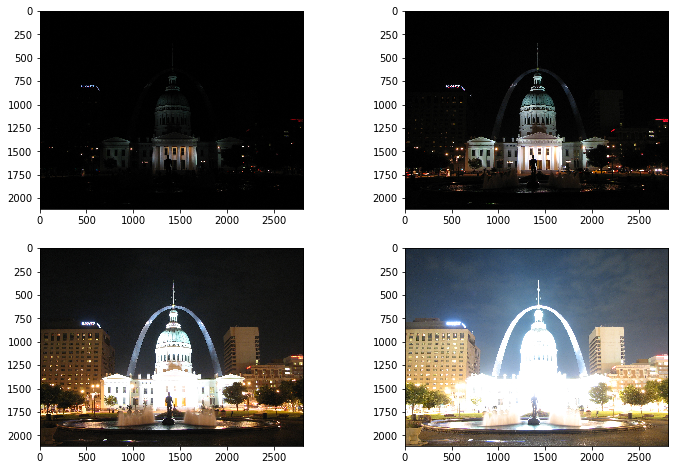

In [0]:
plt.rcParams['figure.figsize'] = [12, 8]
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(stack[i][:,:,::-1])

In [0]:
#Averaging to enhance contrast
hdr = np.mean(stack, axis=0)
hdr = hdr.astype(np.uint8)
hdr.shape

(2112, 2816, 3)

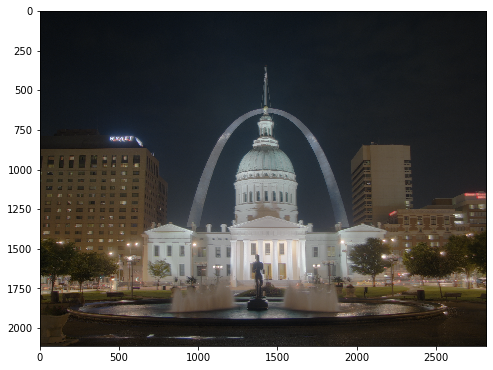

In [0]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(hdr[:,:,::-1])

# Đối với ai tò mò
Reference: https://www.learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/


Bao gồm: 
* Căn chỉnh sử dụng AlignMTB
* Thuật toán chuyển đổi tất cả các hình ảnh thành bitmap ngưỡng trung bình (MTB)
* Một MTB cho hình ảnh được tính bằng cách gán giá trị 1 cho pixel sáng hơn độ chói trung bình và 0 nếu khác
* An MTB is invariant to the exposure time.
* Therefore, the MTBs can be aligned without requiring us to specifying the exposure time

In [0]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(stack, stack)
# Obtain Camera Response Function (CRF)
times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32) #exposure time of each image, known from metadata
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(stack, times)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


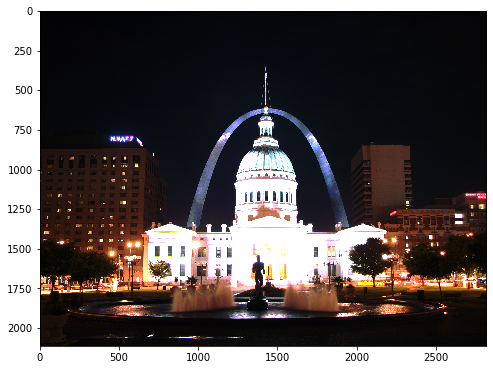

In [0]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(stack, times, responseDebevec)
plt.imshow(hdrDebevec[:,:,::-1])

In [0]:
# Tone mapping = Converting a HDR image to an 8-bit per channel image
# using HDR, the relative brightness information was recovered
# we need to convert the information as a 24-bit image for display
#Common parameters of the different tone mapping algorithms
# 1. gamma. For gamma correction; gamma < 1 darkens the image; gamma >1 brightens the image
# 2. saturation: to increase or decrease the amount of saturation. Higher -> colors are richer and more intense
#     Closer to zero, colors fade away to grayscale
# 3. contrast: controls the contrast. = log(maxPixelvalue/minPixelvalue)

#Opencv implements 4 tone mappings

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


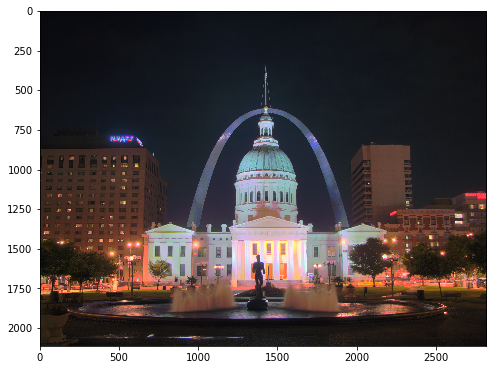

In [0]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.imshow(ldrDrago[:,:,::-1])